# Crunching Data at Scale with Dask

## Spin up Cloud Resources

In [24]:
import coiled

cluster = coiled.Cluster(
    name="uber-lyft",
    n_workers=10,
    package_sync=True,
)

from distributed import Client
client = Client(cluster)

╭───────────────────────────────────────── Package Issues ─────────────────────────────────────────╮
│                      ╷                                                          ╷                │
│   Package            │ Issue                                                    │ Risk Level     │
│ ╶────────────────────┼──────────────────────────────────────────────────────────┼──────────────╴ │
│   libgfortran5       │ 11.3.0 has no install candidate for linux-64             │                │
│   libgfortran        │ 5.0.0 has no install candidate for linux-64              │                │
│   grpcio             │ 1.46.3 has no install candidate for linux-64             │                │
│   grpc-cpp           │ 1.46.3 has no install candidate for linux-64             │                │
│   arrow-cpp          │ 8.0.0 has no install candidate for linux-64              │                │
│   openssl            │ Package ignored                                          │                │
│   coiled-runtime     │ Package ignored                                          │                │
│   abseil-cpp         │ Package ignored                                          │                │
│                      ╵                                                          ╵                │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

/Users/rpelgrim/mambaforge/envs/datashader/lib/python3.10/site-packages/distributed/client.py:1274: VersionMismatchWarning: Mismatched versions found

+---------+--------+-----------+---------+
| Package | client | scheduler | workers |
+---------+--------+-----------+---------+
| lz4     | 4.0.0  | 4.0.2     | 4.0.2   |
+---------+--------+-----------+---------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


## Load Data from S3

In [25]:
import dask.dataframe as dd

In [26]:
df = dd.read_parquet("s3://coiled-datasets/mrocklin/nyc-taxi-fhv/")
df.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
request_datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-31 23:19:44,HV0003,B02887,B02887,2019-01-31 23:57:51,2019-02-01 00:00:25,2019-02-01 01:17:06,68,265,57.380001,4601,...,14.12,0.0,<NA>,0.0,131.330002,N,N,N,N,NaN
2019-01-31 23:33:26,HV0003,B02682,B02682,2019-01-31 23:58:53,2019-02-01 00:01:23,2019-02-01 00:42:33,90,188,8.740000,2471,...,0.60,0.0,<NA>,0.0,16.040001,Y,Y,N,N,NaN
2019-01-31 23:33:41,HV0003,B02887,B02887,2019-02-01 00:00:52,2019-02-01 00:03:36,2019-02-01 00:23:29,186,151,4.580000,1193,...,0.55,0.0,<NA>,0.0,5.330000,Y,Y,N,N,NaN
2019-01-31 23:34:00,HV0003,B02878,B02878,2019-01-31 23:57:06,2019-02-01 00:01:33,2019-02-01 00:11:58,186,125,2.230000,624,...,1.21,0.0,<NA>,1.0,8.280000,N,N,N,N,NaN
2019-01-31 23:35:01,HV0003,B02764,B02764,2019-02-01 00:05:11,2019-02-01 00:05:11,2019-02-01 00:06:10,231,231,0.090000,59,...,0.64,0.0,<NA>,0.0,5.550000,N,N,N,N,NaN


In [27]:
df.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime',
       'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time',
       'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

## Some Basic Analysis

In [4]:
df.tips.max().compute()

1000.0

In [5]:
df.trip_miles.max().compute()

1310.51

In [6]:
(df.tips != 0).mean().compute()

0.15037364554240487

## Drivers' Cut

In [8]:
df.base_passenger_fare.sum().compute()

12770091000.0

In [15]:
df.driver_pay.sum().compute()

10403010000.0

In [16]:
df.sales_tax.sum().compute()

1076015600.0

## Covid Impact

In [20]:
count_per_year = (
    df.groupby(df.pickup_datetime.dt.year).trip_miles.count().compute()
)

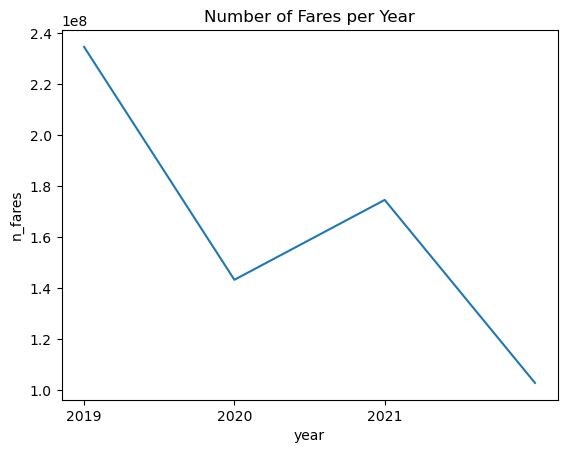

In [22]:
count_per_year.plot(
    xticks=range(2019, 2021 + 1),
    title="Number of Fares per Year",
    xlabel="year",
    ylabel="n_fares",
);

In [ ]:
# this is not super informative since we only have data from 2019 onwards

## Tips per Year

In [29]:
# get mean tip per year
tip_per_year = df.groupby(df.pickup_datetime.dt.year).tips.mean().compute()

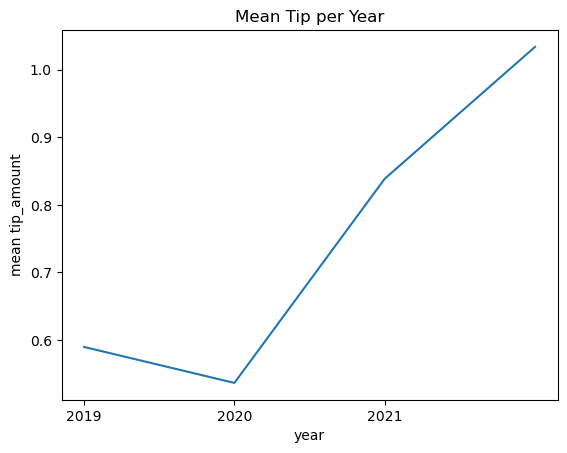

In [30]:
tip_per_year.plot(
    xticks=range(2019, 2021 + 1),
    title="Mean Tip per Year",
    xlabel="year",
    ylabel="mean tip_amount",
);